In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
from google.colab import files
uploaded = files.upload()


Saving Telco-Customer-Churn.csv to Telco-Customer-Churn.csv


In [6]:
df = pd.read_csv("Telco-Customer-Churn.csv")
#Loading the dataset
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
for col in df.select_dtypes(include='object'):
    df[col] = LabelEncoder().fit_transform(df[col])


In [8]:
#Splitting data
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Model 1: Logistic Regression**

In [12]:
# lr = LogisticRegression(max_iter=500)
# lr.fit(X_train, y_train)
# pred_lr = lr.predict(X_test)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

numeric_cols = ['tenure','MonthlyCharges','TotalCharges']
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_scaled, y_train)
pred_lr = lr.predict(X_test_scaled)


**Model 2: Decision Tree**

In [13]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)


**Model 3: Random Forest**

In [14]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)


**Model 4 — XGBoost**

In [15]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_test)

**Evaluating all models:**

In [16]:
def evaluate_model(y_test, y_pred, model_name):
    print("="*40)
    print(model_name)
    print("="*40)
    print("\nAccuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.show()


Logistic Regression

Accuracy: 0.8147622427253371

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409


Confusion Matrix:


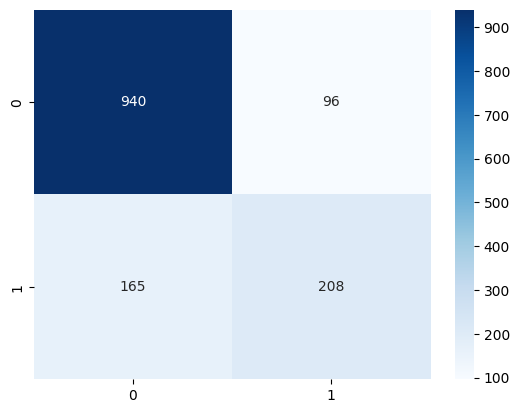

Decision Tree

Accuracy: 0.7224982256919801

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1036
           1       0.48      0.49      0.48       373

    accuracy                           0.72      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.72      0.72      1409


Confusion Matrix:


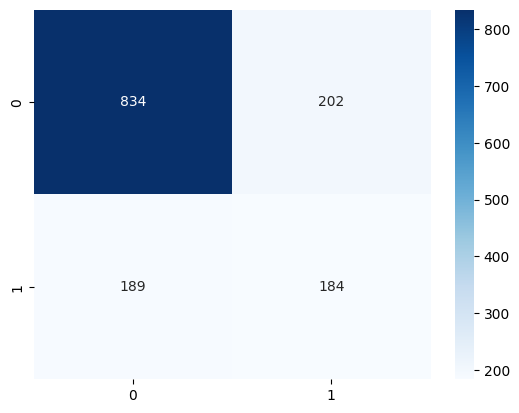

Random Forest

Accuracy: 0.7991483321504613

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.50      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409


Confusion Matrix:


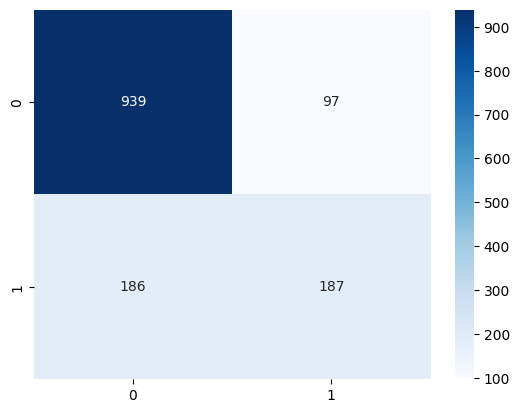

XGBoost

Accuracy: 0.7863733144073811

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86      1036
           1       0.61      0.55      0.58       373

    accuracy                           0.79      1409
   macro avg       0.72      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409


Confusion Matrix:


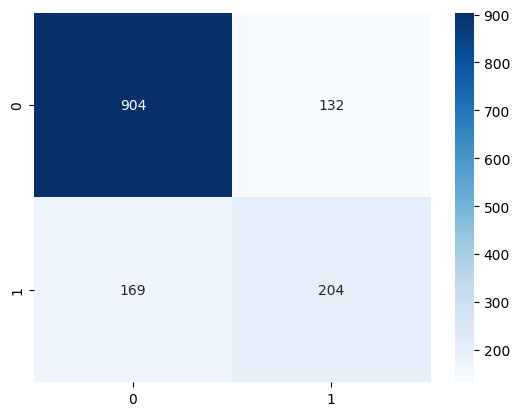

In [19]:
evaluate_model(y_test, pred_lr, "Logistic Regression")
evaluate_model(y_test, pred_dt, "Decision Tree")
evaluate_model(y_test, pred_rf, "Random Forest")
evaluate_model(y_test, pred_xgb, "XGBoost")
